# Example usage of Stokes Class

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pybbtd.stokes as stokes
import pybbtd.btd as btd
import matplotlib.pyplot as plt
import pybbtd as pybbtd

In [2]:
# Create Stokes model
R = 2
L = 2
btd.validate_R_L(R, L)
X = stokes.Stokes([15, 15], R, L)

Sufficient condition for uniqueness satisfied
Stokes tensor initialized with dimensions (15, 15, 4) on LL1 mode.


In [3]:
# Create ground truth tensor
np.random.seed(10)
[A0, B0, C0], T0 = X.generate_stokes_tensor()

In [4]:
theta = X.get_constraint_matrix()
Tnoisy = btd.factors_to_tensor(
    A0, B0, C0, theta, block_mode="LL1"
) + 0 * 1e-5 * np.random.randn(*X.dims)

In [6]:
X.fit(
    data=Tnoisy,
    algorithm="ADMM",
    init="kmeans",
    max_iter=1000,
    rho=1,
    max_admm=1,
    rel_tol=10**-8,
    abs_tol=10**-6,
    admm_tol=10**-10,
)

Reached absolute tolerance threshold. Exiting.


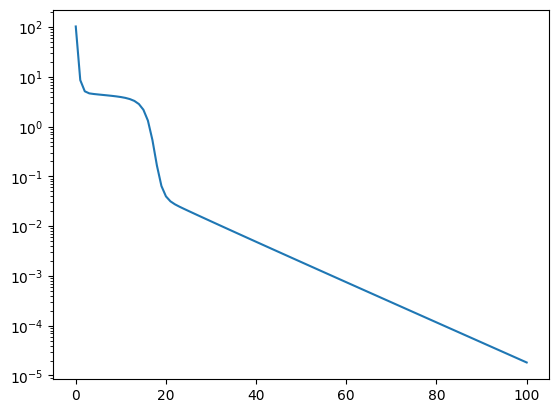

In [7]:
plt.semilogy(X.fit_error)

In [8]:
X.fit_error[-1]

np.float64(1.8268009505438085e-05)

In [9]:
stokes.validate_stokes_tensor(Tnoisy)

All pixels satisfy the Stokes constraints.


In [10]:
brain_arr = np.load(
    "/Users/saulobarreto/Documents/pyBBTD/notebooks/data/StokesTensor250.npy"
)
R = 3
L = 50
S = stokes.Stokes([brain_arr.shape[0], brain_arr.shape[1]], R, L)

Sufficient condition for uniqueness satisfied
Stokes tensor initialized with dimensions (250, 250, 4) on LL1 mode.


In [11]:
# S.fit(brain_arr, 'ADMM', init="random", max_iter=10000)
S.fit(
    brain_arr,
    "ADMM",
    init="kmeans",
    max_iter=100,
    rho=1,
    max_admm=1,
    rel_tol=10**-8,
    abs_tol=10**-8,
    admm_tol=10**-6,
)

/Users/saulobarreto/Documents/pyBBTD/.venv/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/Users/saulobarreto/Documents/pyBBTD/.venv/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/Users/saulobarreto/Documents/pyBBTD/.venv/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/Users/saulobarreto/Documents/pyBBTD/src/pybbtd/solvers/stokes_admm.py:341: RuntimeWarning: Reached max number of iteration. Check convergence.
  warnings.warn(


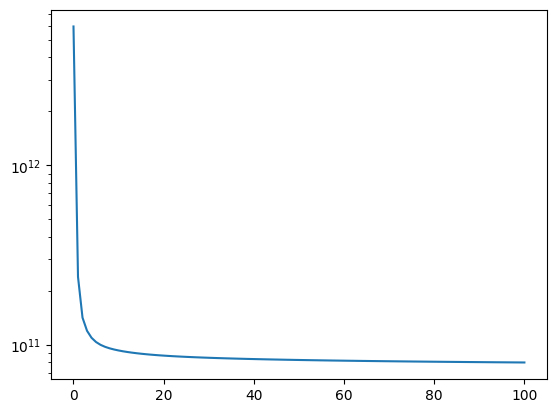

In [12]:
plt.semilogy(S.fit_error)

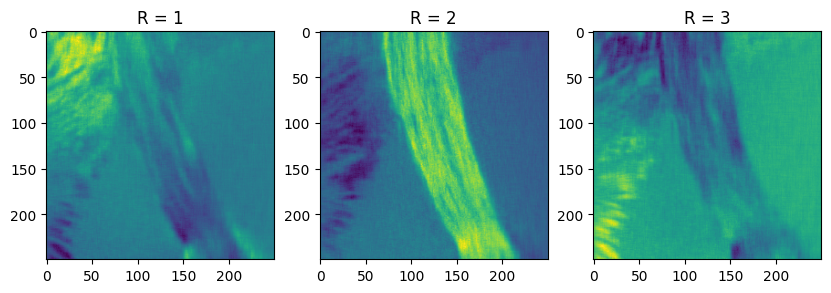

In [13]:
Aest = S.factors[0]
Best = S.factors[1]
Cest = S.factors[2]

fig, axes = plt.subplots(1, R, figsize=(10, 5))

for r in range(R):
    axes[r].imshow(Aest[:, r * L : (r + 1) * L] @ Best[:, r * L : (r + 1) * L].T)
    axes[r].set_title(f"R = {r + 1}")
plt.show()

In [14]:
np.random.seed(10)

R = 2
L = 1
btd.validate_R_L(R, L)
X = stokes.Stokes([7, 8], R, L)

[A0, B0, C0], T0 = X.generate_stokes_tensor()
theta = X.get_constraint_matrix()
Tnoisy = btd.factors_to_tensor(
    A0, B0, C0, theta, block_mode="LL1"
) + 0 * 1e-2 * np.random.randn(*X.dims)
X.fit(
    data=Tnoisy,
    algorithm="ADMM",
    init="random",
    max_iter=1000,
    rho=1,
    max_admm=1,
    rel_tol=10**-3,
    abs_tol=-(10**-15),
    admm_tol=10**-10,
)

print(X.fit_error[-1])

assert X.fit_error[-1] < 10**-1

Sufficient condition for uniqueness satisfied
Stokes tensor initialized with dimensions (7, 8, 4) on LL1 mode.
Exiting early due to unsufficient decrease of cost
0.03801955916924829
